In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.corpus import PlaintextCorpusReader

In [2]:
# data를 corpus화
corpus_root = 'C://Users/ji hye/Python_C_Java_Prolog_data/Prolog_data_3000'
QACorpus = nltk.corpus.PlaintextCorpusReader(corpus_root, ".*\.txt", encoding="utf_8")

In [3]:
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['file_1.txt',
 'file_10.txt',
 'file_100.txt',
 'file_1000.txt',
 'file_1001.txt',
 'file_1002.txt',
 'file_1003.txt',
 'file_1004.txt',
 'file_1005.txt',
 'file_1006.txt',
 'file_1007.txt',
 'file_1008.txt',
 'file_1009.txt',
 'file_101.txt',
 'file_1010.txt',
 'file_1011.txt',
 'file_1012.txt',
 'file_1013.txt',
 'file_1014.txt',
 'file_1015.txt',
 'file_1016.txt',
 'file_1017.txt',
 'file_1018.txt',
 'file_1019.txt',
 'file_102.txt',
 'file_1020.txt',
 'file_1021.txt',
 'file_1022.txt',
 'file_1023.txt',
 'file_1024.txt',
 'file_1025.txt',
 'file_1026.txt',
 'file_1027.txt',
 'file_1028.txt',
 'file_1029.txt',
 'file_103.txt',
 'file_1030.txt',
 'file_1031.txt',
 'file_1032.txt',
 'file_1033.txt',
 'file_1034.txt',
 'file_1035.txt',
 'file_1036.txt',
 'file_1037.txt',
 'file_1038.txt',
 'file_1039.txt',
 'file_104.txt',
 'file_1040.txt',
 'file_1041.txt',
 'file_1042.txt',
 'file_1043.txt',
 'file_1044.txt',
 'file_1045.txt',
 'file_1046.txt',
 'file_1047.txt',
 'file_1048.txt',
 '

In [4]:
titles = [title[:-4] for title in QACorpus.fileids()]
titles[:10]

['file_1',
 'file_10',
 'file_100',
 'file_1000',
 'file_1001',
 'file_1002',
 'file_1003',
 'file_1004',
 'file_1005',
 'file_1006']

In [5]:
synopses = [QACorpus.raw(title + ".txt") for title in titles]
synopses[:2]

["What is the simple way to find the max length of a list in prolog?\r\nI'm new to learn the Prolog, I have a list, which looks like -> [[6, 7, 8,9], [6, 7, 8, 9], [6, 7, 8, 9], [7, 8, 9], [7, 8, 9],[5,6,7]], I want to find the all max length lists in the list, In this case, it should return [[6,7,8,9],[6,7,8,9],[6,7,8,9]]\r\nmy code\r\n\r\n\r\nmaxlist([A],A).\r\nmaxlist([A,B|Rest],Max):-\r\n    maxlist([B|Rest],Maxrest),\r\n    max(A,Maxrest,Max).\r\n\r\nmax(A,B,A):-\r\n    length(A,N1),\r\n    length(B,N2),\r\n    N1>N2.\r\nmax(A,B,B):-\r\n    length(A,N1),\r\n    length(B,N2),\r\n    N2>N1. \r\n\r\n\r\nI could only find the one, I don't know how I find all, please don’t solve this predicate in complicate way or use complicates functor, it’s hard to understand for me.The big issue with this problem is the repeated iteration of the list and its sublists, is it not?\r\nI would start with a predicate that iterates over your list-of-lists once, prefixing each sublist with its length, and

In [6]:
# stopwords 단어 제거 하기 위해 nltk download 실행
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# stopwords by english 이용하기
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# lemmatize(표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미) 이용하기
# lemmatize : 단어의 형태학적 파싱을 먼저 진행하기 위해
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# 정규표현식과 Lemmatize를 사용해 필요한 단어만 추출
def tokenize_and_lemmatize(text):
    tokens  = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

# 정규표현식을 사용해 필요한 단어만 추출, Lemmatize를 적용하기 전의 단어
def tokenize_only(text):
    tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ji
[nltk_data]     hye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# synopses에 함수 적용해 단어 추출하기
totalvocab_lemmatized = []
totalvocab_tokenized = []
for i in synopses:
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [12]:
# 결과 - 추출된 단어
print(totalvocab_lemmatized[:20])
print(totalvocab_tokenized[:20])

['what', 'is', 'the', 'simple', 'way', 'to', 'find', 'the', 'max', 'length', 'of', 'a', 'list', 'in', 'prolog', 'i', 'new', 'to', 'learn', 'the']
['What', 'is', 'the', 'simple', 'way', 'to', 'find', 'the', 'max', 'length', 'of', 'a', 'list', 'in', 'prolog', 'I', 'new', 'to', 'learn', 'the']


In [13]:
# 단어의 원형을 찾을 수 있게 하는 데이터
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)
print("there are" + str(vocab_frame.shape[0]) + "items in vocab_frame")

there are4954383items in vocab_frame


In [14]:
print(vocab_frame.head())

         words
what      What
is          is
the        the
simple  simple
way        way


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 객체 선언
# max_df: 문서 내의 80% 이상이 그 단어로 이루어지면 고려 X
# min_idf: 적어도 20%의 문서 내에서 해당 단어를 포함하고 있어야 함
# max_features: feature의 최대 수 지정해주기
# ngram_range: 단어 collocation 몇개까지 할지
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

# TF-IDF 벡터화의 최종 결과물
print(tfidf_matrix.shape)

C:\Users\ji hye\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


CPU times: total: 1min 18s
Wall time: 1min 18s
(3000, 103)


In [16]:
# 특징(단어사전) - 알파벳 순 정렬
terms = tfidf_vectorizer.get_feature_names() 
terms[:100]

C:\Users\ji hye\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['[',
 '[ [',
 '[ ]',
 '[ ] [',
 '[ b',
 '[ x',
 ']',
 '] [',
 '] [ ]',
 '] ]',
 '] x',
 '_',
 '``',
 'add',
 'answer',
 'append',
 'argument',
 'b',
 'b c',
 'c',
 'case',
 'check',
 'clause',
 'code',
 'd',
 'different',
 'doe',
 'e',
 'element',
 'error',
 'example',
 'fact',
 'fail',
 'false',
 'following',
 'function',
 'given',
 'goal',
 'h',
 'ha',
 'help',
 'input',
 'instead',
 'just',
 'know',
 'l',
 'length',
 'library',
 'like',
 'list',
 'look',
 'make',
 'member',
 'n',
 'need',
 'new',
 'note',
 'number',
 'output',
 'p',
 'possible',
 'predicate',
 'problem',
 'program',
 'query',
 'question',
 'r',
 'result',
 'return',
 'right',
 'rule',
 'run',
 's',
 'second',
 'solution',
 'start',
 't',
 'term',
 'test',
 'think',
 'time',
 'tried',
 'true',
 'try',
 'trying',
 'use',
 'used',
 'using',
 'value',
 'variable',
 'wa',
 'want',
 'way',
 'work',
 'write',
 'x',
 'x [',
 'x [ ]',
 'x x',
 'x y']

In [17]:
# document간의 distance를 젤 때 사용 -> 각도가 크면 클 수록 서로 동떨어진 자료
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

K-means clustering

In [18]:
from sklearn.cluster import KMeans

# 군집화 할 그룹의 갯수 정의
num_clusters = 21

# k-means 알고리즘 적용
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: total: 21.8 s
Wall time: 5.15 s


In [19]:
# pandas로 데이터 객체 생성하기
import pandas as pd

thesis = { 'Title': titles, 'Synopsis': synopses, 'Cluster': clusters}

frame = pd.DataFrame(thesis, index=[clusters], columns = ['Title', 'Synopsis', 'Cluster'])

In [20]:
frame.head(20)

Title                                           Synopsis  Cluster
7      file_1  What is the simple way to find the max length ...        7
16    file_10  how to search a prolog knowledge base using py...       16
14   file_100  prolog - DCG transformationWhat does E -> T me...       14
8   file_1000  How to embed SWI-Prolog in a Unity3D project\r...        8
17  file_1001  What is the right error for corner cases of da...       17
9   file_1002  Prolog argument mode indicator causes output f...        9
6   file_1003  Eclipse Prolog: How to make a program that sol...        6
7   file_1004  Prolog: maplist (Vars in 1..9) on every elemen...        7
9   file_1005  How do you know if the elements of a list are ...        9
7   file_1006  Prolog counting\r\nI'm trying to learn Prolog ...        7
14  file_1007  Prolog: update element of list\r\nI have a lis...       14
1   file_1008  Flattening a tree in linear time using Prolog\...        1
7   file_1009  Combine two lists without duplicates prolog\r\...        7
14   file_101  How to express the allDifferent/6 predicate?Le...       14
11  file_1010  Prolog connection between 2 in a family tree\r...       11
20  file_1011  Prolog - Parser Fails when using Unary Minus\r...       20
1   file_1012  PROLOG : Given a number X, find all multiples ...        1
8   file_1013  Read files in Prolog\r\nI need a program that ...        8
14  file_1014  How can I bind the same variables together in ...       14
13  file_1015  Multiple variables in list and checking if lis...       13

In [21]:
# 각 cluster별로 분류된 파일 개수
frame['Cluster'].value_counts()

19    447
7     317
11    254
14    231
9     209
10    162
18    149
3     148
2     144
8     111
16    109
1      97
5      90
4      88
15     86
17     77
12     69
13     62
20     62
0      45
6      43
Name: Cluster, dtype: int64

In [22]:
# cluster별로 중요한 term들
from __future__ import print_function  

print("Top terms per cluster:")
print()  

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='') #replace 6 with n words per cluter
    for ind in order_centroids[i,:5]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    
    
    for title in frame.loc[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: E, ], [, [, Xs,

Cluster 0 titles: file_1102, file_1127, file_1181, file_1275, file_1293, file_1345, file_1380, file_1383, file_1439, file_1451, file_1524, file_1540, file_1578, file_1631, file_1634, file_1750, file_1767, file_1819, file_1821, file_1858, file_1986, file_2, file_2023, file_2088, file_2343, file_2360, file_2368, file_2411, file_2442, file_2460, file_2530, file_2607, file_2700, file_2718, file_2815, file_2823, file_2839, file_2860, file_2877, file_448, file_45, file_530, file_557, file_695, file_912,

Cluster 1 words: L, ], [, [, list,

Cluster 1 titles: file_1008, file_1012, file_1039, file_1068, file_1089, file_1116, file_1236, file_1256, file_1257, file_1283, file_1286, file_1357, file_1392, file_1434, file_1444, file_1485, file_1491, file_1505, file_1538, file_1584, file_1670, file_1693, file_1707, file_1831, file_1862, file_1867, file_1893, file_1894, file_1910, file_1950, file_2033, file_2086, file_2131, file_2142, file_2193,

Cluster 8 words: program, using, number, code, use,

Cluster 8 titles: file_1000, file_1013, file_1021, file_1028, file_1047, file_1080, file_1091, file_1135, file_1152, file_1221, file_1237, file_1274, file_1296, file_1327, file_1363, file_1373, file_1404, file_1463, file_1544, file_1556, file_1570, file_1592, file_1625, file_1628, file_1690, file_1721, file_1751, file_1772, file_1808, file_1822, file_1864, file_1876, file_1879, file_1892, file_1904, file_1928, file_1943, file_2035, file_2062, file_2078, file_2081, file_2106, file_2138, file_2184, file_2266, file_2273, file_2355, file_2367, file_2376, file_2446, file_2466, file_2480, file_2500, file_2502, file_2525, file_2526, file_2531, file_2546, file_2587, file_259, file_2591, file_2596, file_262, file_2642, file_267, file_271, file_2710, file_2763, file_2793, file_2795, file_2806, file_2809, file_2829, file_2868, file_2894, file_2896, file_2928, file_295, file_2956, file_2966, file_2982, file_2984, file_33, file_358, file_367, fil

Cluster 13 words: write, Xs, ``, _, code,

Cluster 13 titles: file_1015, file_1031, file_1066, file_1082, file_1093, file_1098, file_1131, file_1143, file_1225, file_1272, file_1277, file_1448, file_1457, file_1590, file_1623, file_1705, file_1722, file_1761, file_1901, file_1926, file_1929, file_1945, file_2126, file_2249, file_2253, file_2254, file_2255, file_2259, file_2265, file_2300, file_2301, file_2327, file_2348, file_2393, file_2428, file_2521, file_2549, file_2574, file_2588, file_2620, file_2637, file_269, file_2703, file_2721, file_2779, file_2781, file_2818, file_2821, file_2952, file_2970, file_315, file_336, file_418, file_453, file_478, file_516, file_567, file_599, file_616, file_686, file_741, file_978,

Cluster 14 words: [, ], ], [, ],

Cluster 14 titles: file_100, file_1007, file_101, file_1014, file_1016, file_1025, file_1058, file_1077, file_1078, file_1085, file_1105, file_1115, file_1134, file_1161, file_1171, file_1202, file_1206, file_1210, file_1244, file_124

Cluster 20 words: terms, Variable, [, ], Xs,

Cluster 20 titles: file_1011, file_1070, file_1074, file_1144, file_1184, file_1227, file_1229, file_1335, file_1354, file_1396, file_1440, file_1471, file_1508, file_1528, file_1541, file_1565, file_1569, file_1583, file_1627, file_1630, file_1633, file_1638, file_1734, file_1739, file_1801, file_1803, file_1824, file_1844, file_1848, file_1905, file_1942, file_1948, file_1963, file_2058, file_2188, file_2228, file_2271, file_2326, file_2477, file_2542, file_2567, file_2584, file_2644, file_2649, file_27, file_2765, file_2782, file_2796, file_2805, file_2881, file_2908, file_2930, file_422, file_429, file_437, file_48, file_496, file_611, file_681, file_721, file_935, file_945,



Multidimensional scaling

In [23]:
# 고차원 공간을 2차원으로 압축
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()#다차원 스케일링을 사용하여 dist 행렬을 2차원 배열로 변환

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [24]:
print(xs[:10])
print(ys[:10])

[ 0.13693069 -0.57101609 -0.02477955 -0.73392094  0.15204727 -0.37294522
  0.01987482  0.12949796  0.20778481  0.18593705]
[-0.34153561  0.21536789 -0.24503315  0.39831621  0.61392672  0.00750328
  0.56140991 -0.41675623 -0.19675803 -0.36037088]


Visualizing document clusters

In [25]:
# 딕셔너리를 사용해 색상 설정하기
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#b2182b', 6:'#3f007d',7:'#8dd3c7', 8:'#f1a340',9:'#35978f',
                 10: '#f5f545',  11: '#18d3e9', 12: '#1a19c8', 13: '#68f545', 14:'#010b12', 15:'#065b96', 16:'#28d4ac',17:'#32727d', 18:'#3f1554', 
                 19:'#61075c', 20:'#ba4c07'}
# 딕셔너리를 사용해 클러스터 이름 지정하기(단어로 지정 가능)
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10: 'Cluster 10',
                 11: 'Cluster 11',
                 12: 'Cluster 12',
                 13: 'Cluster 13',
                 14: 'Cluster 14',
                 15: 'Cluster 15',
                 16: 'Cluster 16',
                 17: 'Cluster 17',
                 18: 'Cluster 18',
                 19: 'Cluster 19',
                 20: 'Cluster 20'
                }

In [26]:
# DataFrame 생성하기
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
df.head(10)

x         y  label      title
0  0.136931 -0.341536      7     file_1
1 -0.571016  0.215368     16    file_10
2 -0.024780 -0.245033     14   file_100
3 -0.733921  0.398316      8  file_1000
4  0.152047  0.613927     17  file_1001
5 -0.372945  0.007503      9  file_1002
6  0.019875  0.561410      6  file_1003
7  0.129498 -0.416756      7  file_1004
8  0.207785 -0.196758      9  file_1005
9  0.185937 -0.360371      7  file_1006

In [27]:
# cluster로 group화 하기
groups = df.groupby('label')
groups.size()

label
0      45
1      97
2     144
3     148
4      88
5      90
6      43
7     317
8     111
9     209
10    162
11    254
12     69
13     62
14    231
15     86
16    109
17     77
18    149
19    447
20     62
dtype: int64

In [28]:
for name, group in groups:
    print("Cluster", name)
    print(group)
    print()

Cluster 0
             x         y  label      title
116  -0.243459 -0.395980      0  file_1102
143  -0.260408 -0.347369      0  file_1127
203  -0.076426 -0.189474      0  file_1181
307  -0.143861 -0.191163      0  file_1275
327  -0.044051 -0.344976      0  file_1293
385  -0.459450 -0.051755      0  file_1345
424   0.481836  0.553856      0  file_1380
427  -0.754256 -0.183226      0  file_1383
489  -0.705487 -0.211856      0  file_1439
503   0.484835 -0.063340      0  file_1451
584  -0.173350  0.181103      0  file_1524
602  -0.157396 -0.148519      0  file_1540
643   0.621737 -0.112978      0  file_1578
703   0.484054  0.172396      0  file_1631
706  -0.360782  0.064448      0  file_1634
835  -0.186656 -0.562226      0  file_1750
853   0.679088  0.328973      0  file_1767
911  -0.050119 -0.481070      0  file_1819
914  -0.368629  0.048400      0  file_1821
954   0.528080  0.211625      0  file_1858
1096 -0.105933 -0.365636      0  file_1986
1111 -0.095139 -0.286753      0     file_2
1

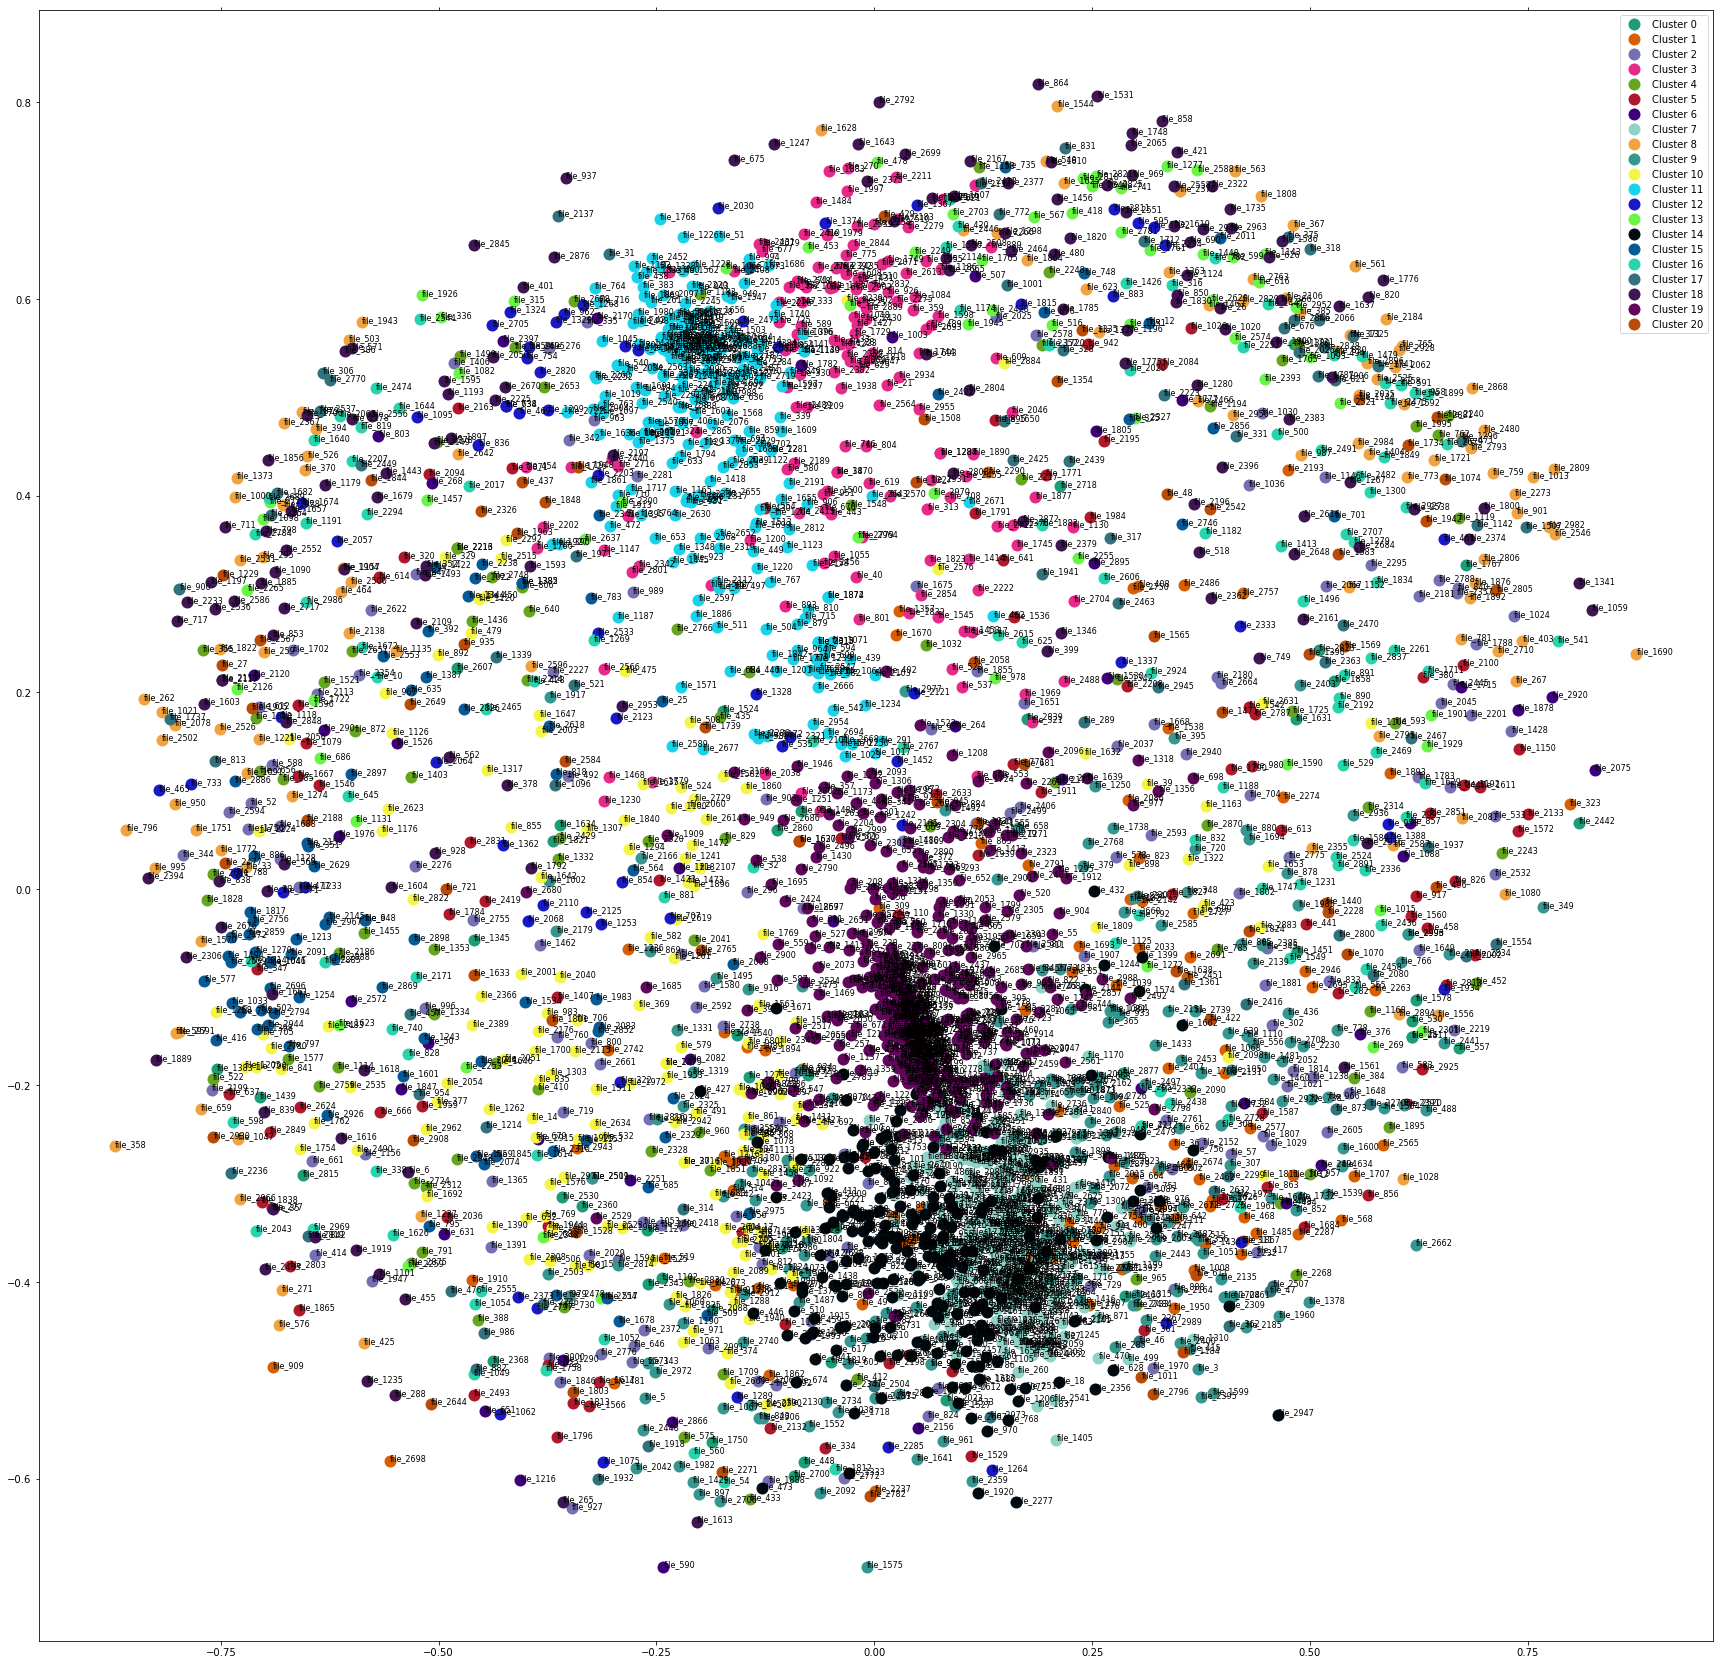

In [29]:
fig, ax = plt.subplots(figsize=(30, 30)) # size 지정하기
ax.margins(0.05) # 5% padding 추가하기

# iterate through groups to layer the plot
# name에는 cluster number가 group에는 데이터들이 저장
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

# legend 설정하기
ax.legend(numpoints=1)  #show legend with only 1 point

# (x, y)위치에 논문 title 텍스트 추가하기 
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

#show the plot
plt.show()

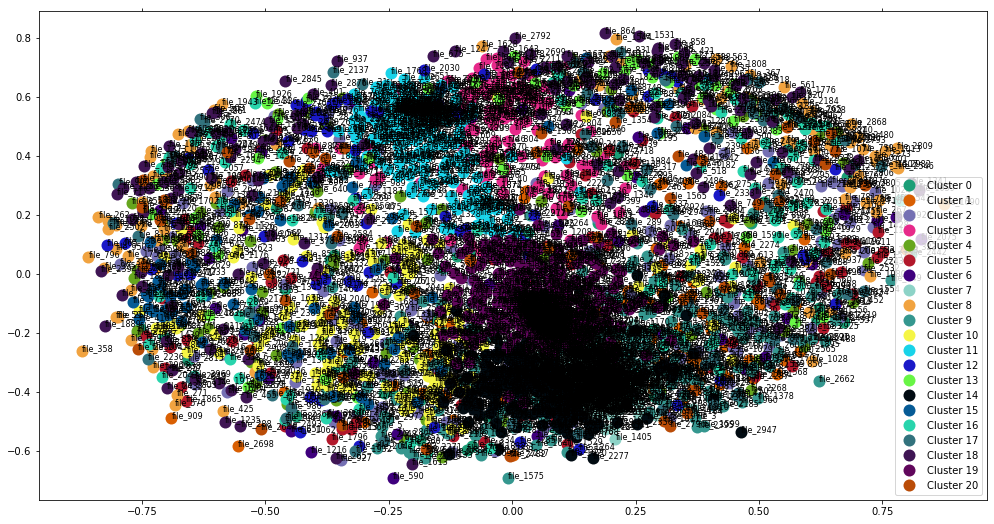

In [30]:
fig, ax = plt.subplots(figsize=(17, 9)) # size 지정하기
ax.margins(0.05) # 5% padding 추가하기

# iterate through groups to layer the plot
# name에는 cluster number가 group에는 데이터들이 저장
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

# legend 설정하기
ax.legend(numpoints=1)  #show legend with only 1 point

# (x, y)위치에 논문 title 텍스트 추가하기 
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

#show the plot
plt.show()

In [31]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [32]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

Hierarchical document clustering

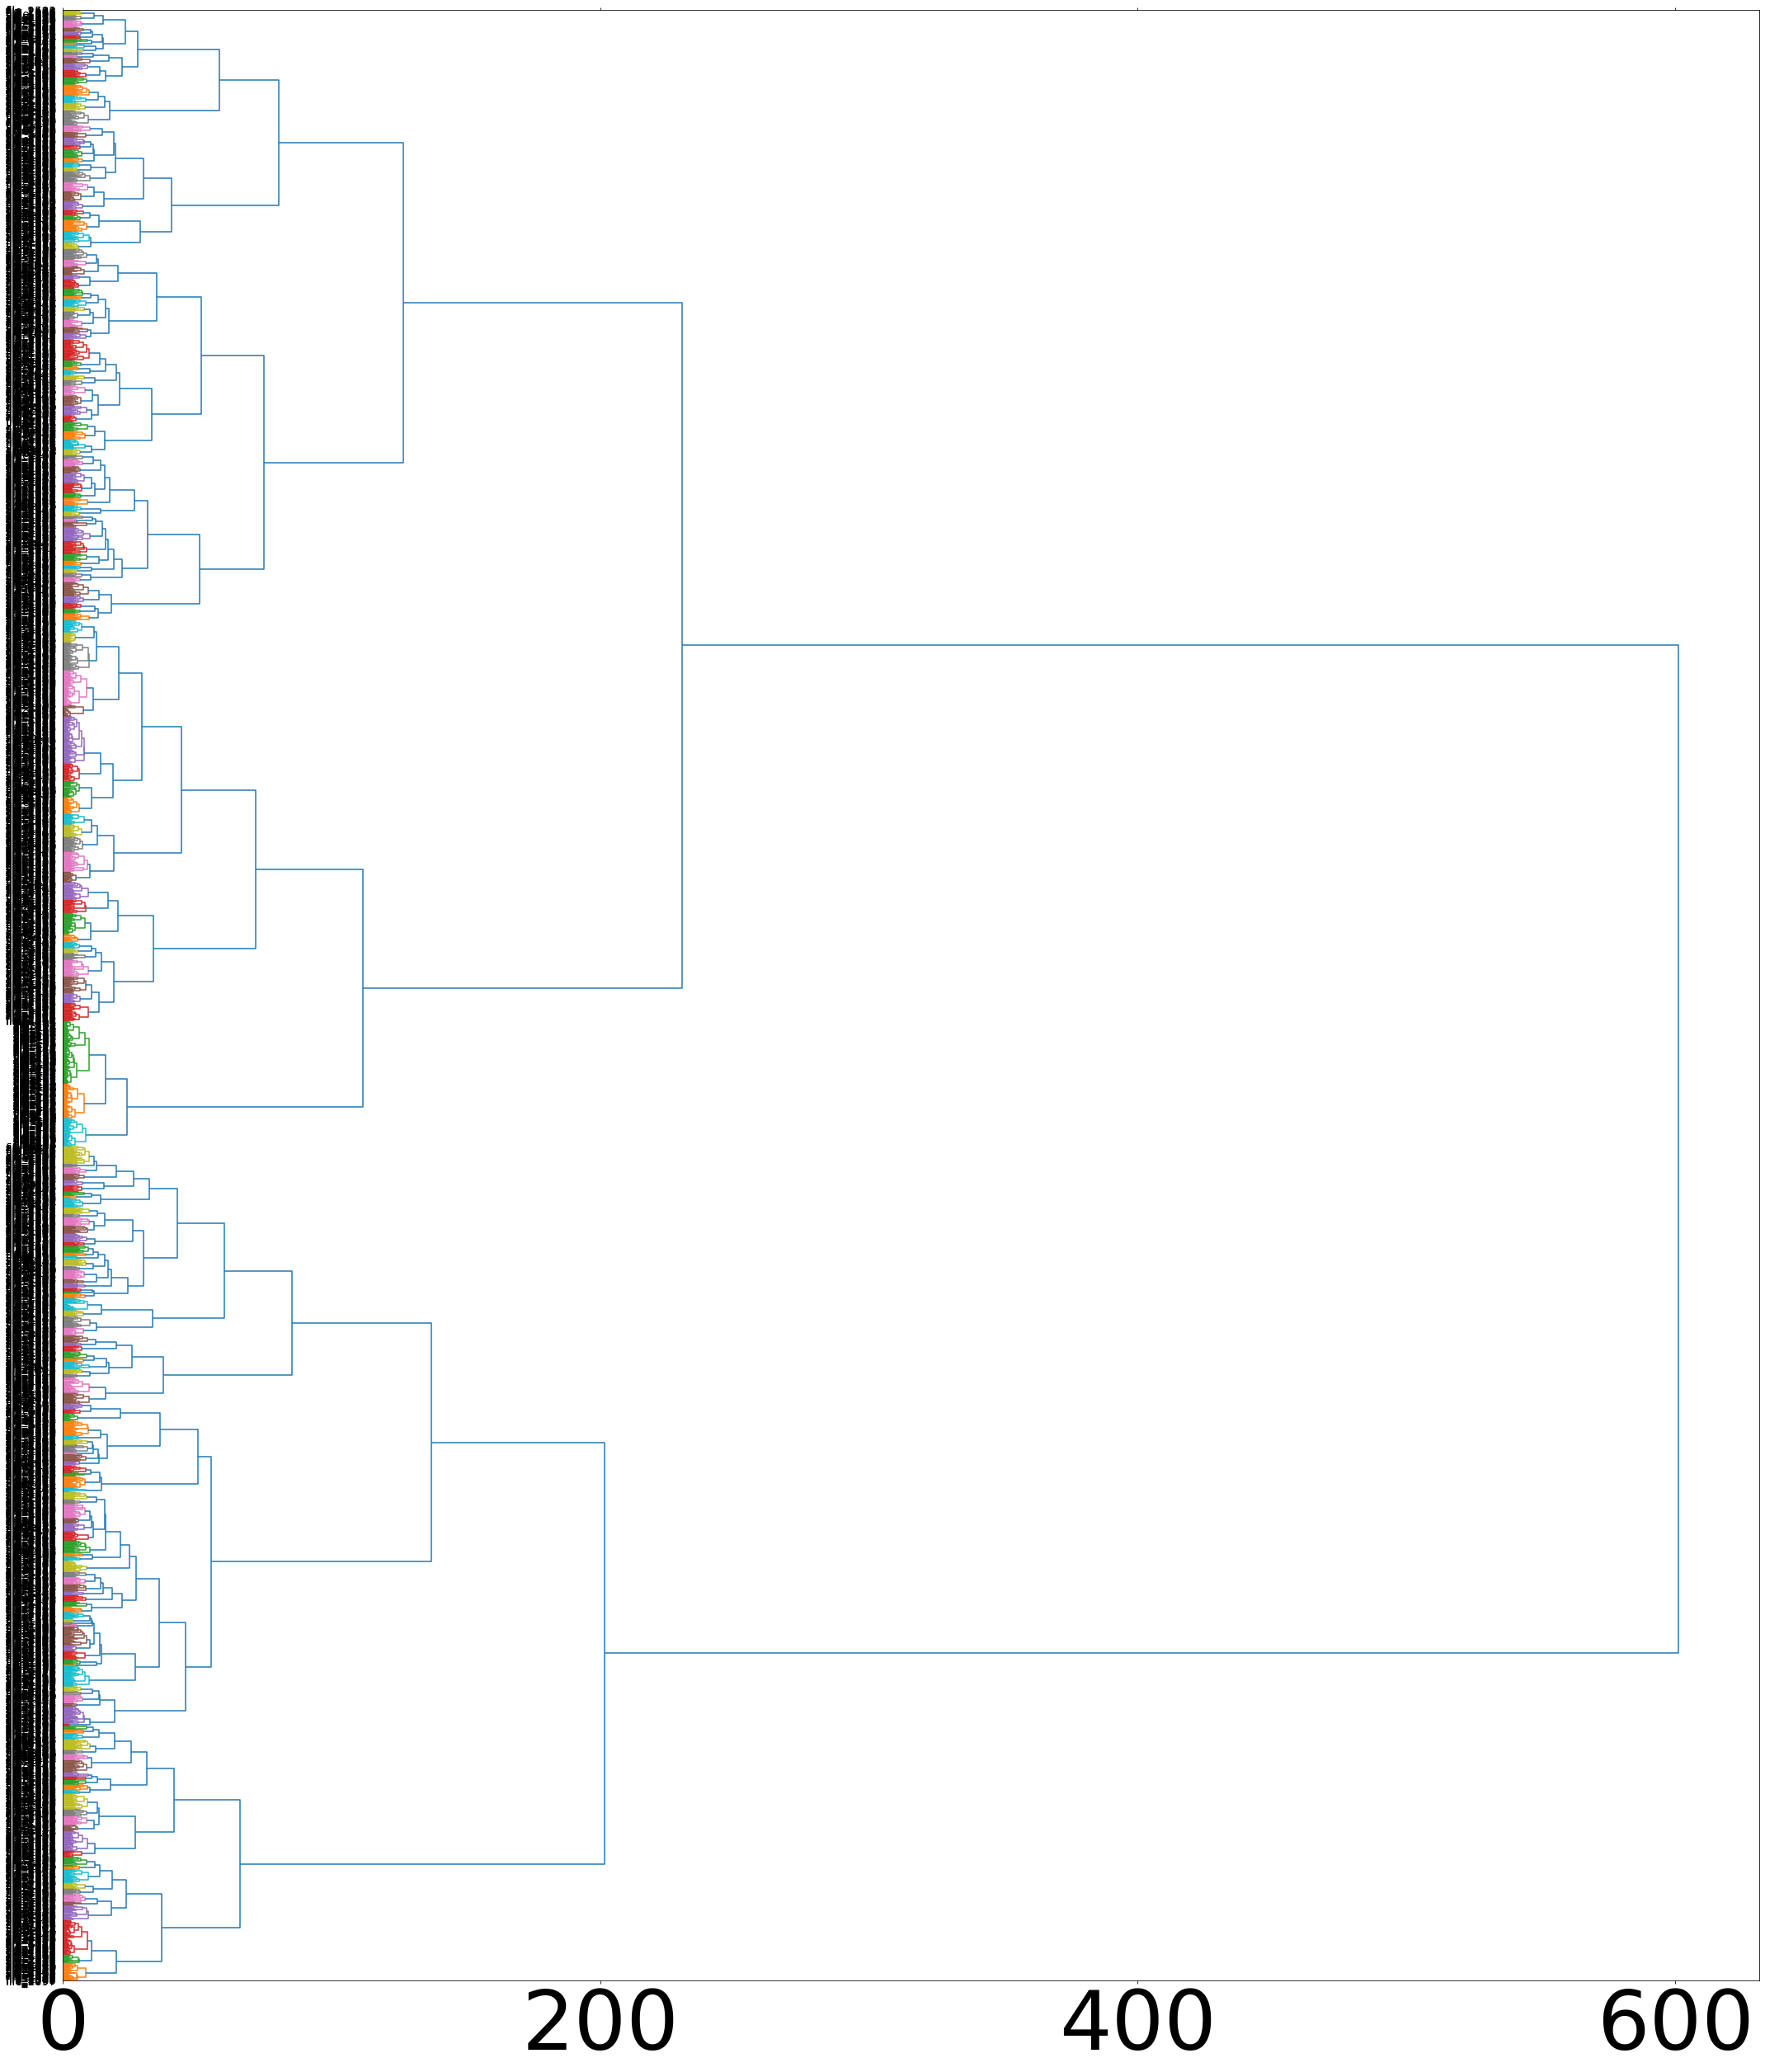

In [33]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(30, 35)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_QA.png', dpi=200) #save figure as ward_clusters

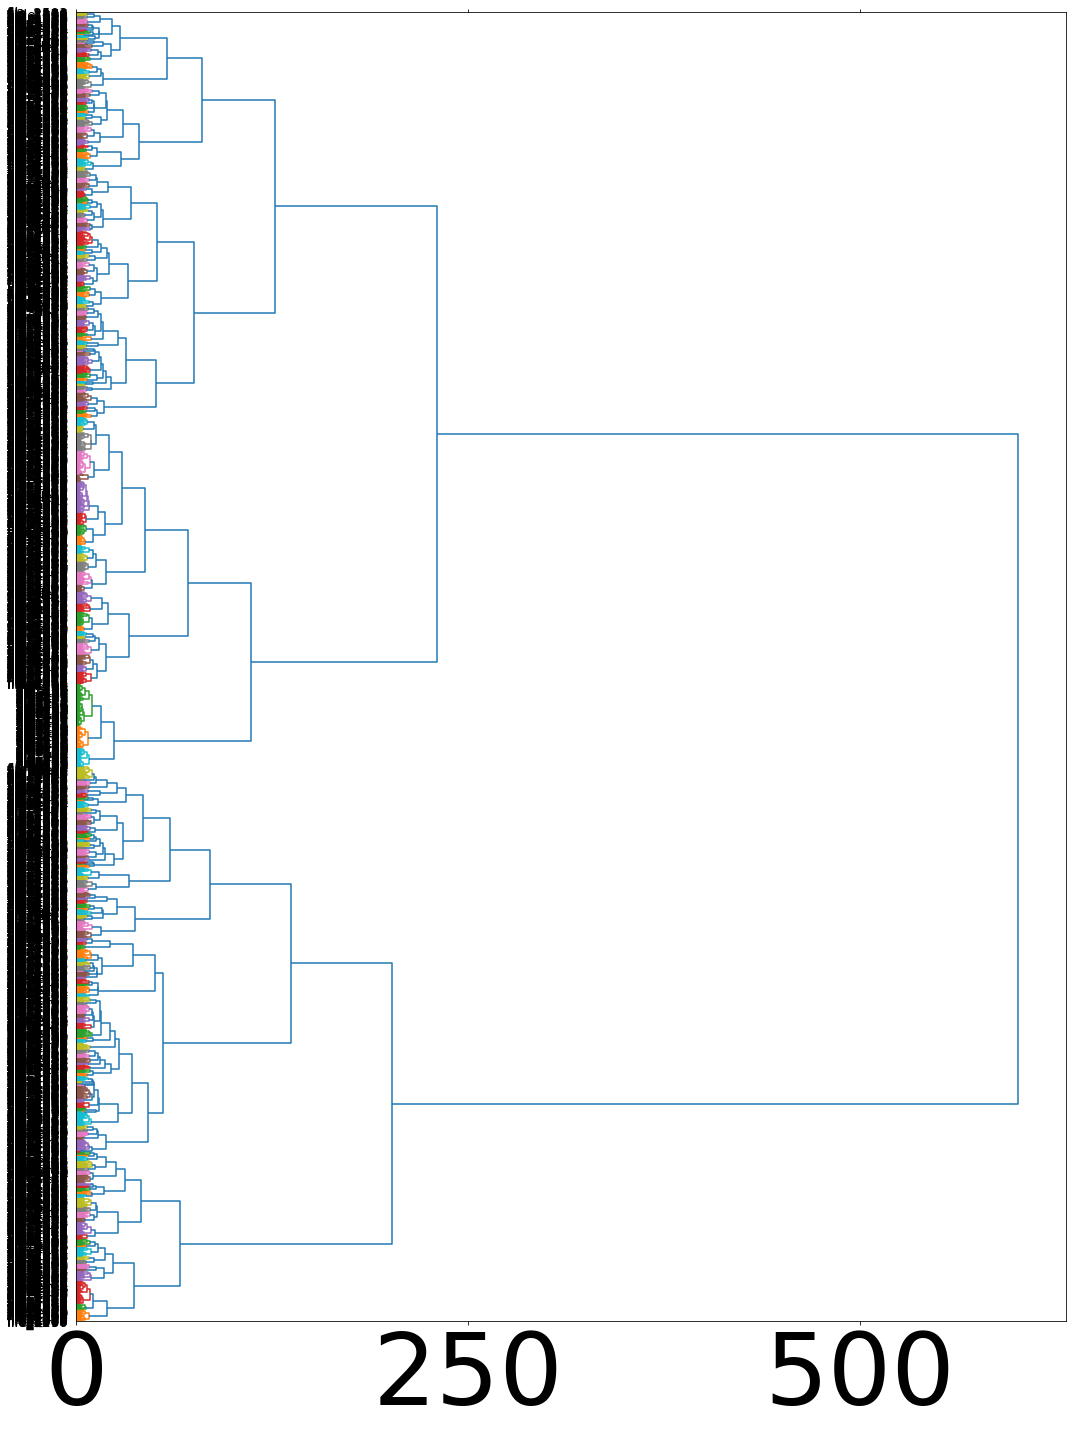

In [34]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_QA_1.png', dpi=200) #save figure as ward_clusters

In [35]:
plt.close()

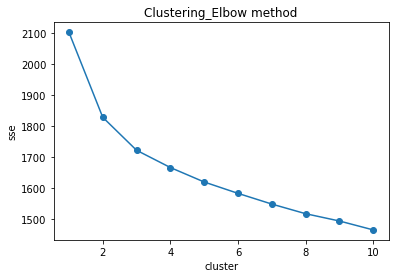

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

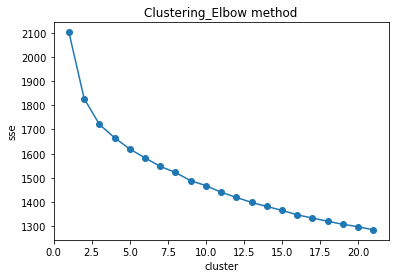

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,22):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,22), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

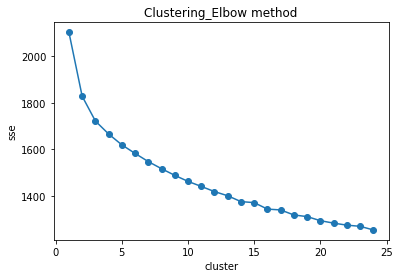

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,25):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,25), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

# Latent Dirichlet Allocation

In [39]:
#텍스트 고유 한 이름 제거(문장에서 첫 단어를 잡아 당기는 것) 
import string
def strip_proppers(text):
    # 먼저 문장 단위로 토큰 화 한 다음 단어 단위로 토큰 화하여 구두점이 자체 토큰 
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [40]:
#실제 텍스트 처리 (고유 명사 제거, 토큰 화, 불용어 제거)를 실행

#텍스트에서 모든 명사 (NNP) 또는 복수 명사 (NNPS) strip 
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split())
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [41]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in synopses]

#tokenize
%time tokenized_text = [tokenize_and_lemmatize(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: total: 42.4 s
Wall time: 42.4 s
CPU times: total: 22.9 s
Wall time: 23 s
CPU times: total: 3.75 s
Wall time: 3.75 s


In [42]:
# Gensim 특정 변환 극단적인 단어 필터링
# Gensim 사전 만들기
dictionary = corpora.Dictionary(texts)

#극단 값 제거 (tf-idf 행렬을 만들 때 사용되는 최소/최대 df 단계와 유사)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#사전을 참조 용 단어 모음으로 변환
corpus = [dictionary.doc2bow(text) for text in texts]

In [43]:
#LDA는 문서가 주제의 혼합이고 문서의 각 단어가 문서의 주제에 기인한다고 가정하는 확률 적 주제 모델
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: total: 1h 26min 23s
Wall time: 23min 50s


In [44]:
# 각 주제에는 특정 확률과 함께 정의하는 단어 세트
lda . show_topics ()

[(0,
  '0.011*"write" + 0.008*"predicate" + 0.007*"list" + 0.007*"rule" + 0.006*"edge" + 0.006*"code" + 0.005*"true" + 0.005*"member" + 0.005*"like" + 0.004*"time"'),
 (1,
  '0.019*"list" + 0.010*"predicate" + 0.008*"like" + 0.006*"one" + 0.006*"use" + 0.006*"b" + 0.006*"element" + 0.006*"code" + 0.006*"first" + 0.006*"true"'),
 (2,
  '0.024*"list" + 0.011*"predicate" + 0.009*"b" + 0.007*"like" + 0.007*"true" + 0.007*"write" + 0.007*"use" + 0.007*"element" + 0.007*"c" + 0.006*"first"'),
 (3,
  '0.017*"list" + 0.010*"predicate" + 0.009*"b" + 0.007*"like" + 0.007*"write" + 0.007*"use" + 0.007*"code" + 0.006*"c" + 0.006*"true" + 0.005*"one"'),
 (4,
  '0.026*"b" + 0.023*"list" + 0.018*"c" + 0.009*"predicate" + 0.007*"e" + 0.006*"element" + 0.006*"like" + 0.006*"f" + 0.006*"true" + 0.006*"use"')]

In [45]:
# 주제를 각 주제의 상위 20개 단어 목록으로 변환
# k- means clustering 사용하여 확인한 것과 유사하게 주제 분류 확인 가능
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('write', 0.0109512815)", "('predicate', 0.00808836)", "('list', 0.006562286)", "('rule', 0.006544898)", "('edge', 0.006296836)", "('code', 0.0060677286)", "('true', 0.0054570423)", "('member', 0.0050099017)", "('like', 0.004652896)", "('time', 0.004381738)", "('nl', 0.0042321873)", "('point', 0.0041870824)", "('one', 0.004120082)", "('use', 0.0039343364)", "('solution', 0.003847801)", "('would', 0.0035469965)", "('get', 0.0035422945)", "('example', 0.003470836)", "('ha', 0.0034238107)", "('first', 0.0034176991)"]

["('list', 0.019357715)", "('predicate', 0.009615291)", "('like', 0.007552703)", "('one', 0.0064330655)", "('use', 0.006376748)", "('b', 0.006335132)", "('element', 0.0062354538)", "('code', 0.0061112195)", "('first', 0.0058342027)", "('true', 0.005668091)", "('get', 0.005389879)", "('solution', 0.0053385226)", "('false', 0.005274346)", "('example', 0.0052551655)", "('member', 0.005174837)", "('write', 0.0049978774)", "('c', 0.0049435287)", "('variable', 0.0049093403)", "(

C:\Users\ji hye\AppData\Local\Temp\ipykernel_9536\3569940839.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topics_matrix = np.array(topics_matrix)
